# import package and set read path

In [1]:
import sys
import scanpy as sc 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import random 
np.random.seed(1) 
random.seed(1) 
import os

os.chdir("/DATA2/zhangjingxiao/yxk/scDML_project/")
from scDML.metrics import evaluate_dataset
from scDML.utils import ari # sklearn bug,not using sklearn.cluster.metrics

####################################################
dataset="pancreas"
ncelltype=13
####################################################
read_dir="../evaluation/"+dataset+"/"
save_dir="../evaluation/"+dataset+"/"
os.chdir("/DATA2/zhangjingxiao/yxk/scDML_project/evaluation/")

# Raw

AnnData object with n_obs × n_vars = 14890 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'tech', 'replicate', 'assigned_cluster', 'celltype', 'dataset', 'BATCH'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'BATCH_colors', 'celltype_colors', 'hvg', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
...................................................................................................
..........................................method=Raw.............................................
..............................calculate ari nmi according to nceltype=13...........................
find resolution...
obtained_clusters=-1
obtained_clusters=29
obtained_clusters=25
obtained_clusters=20
louvain clustering result(resolution=0.125):n_cluster=13
ARI: 0.5026958358623662
NMI: 0.6618748620520849
.................................. calculate BatchKL  .....

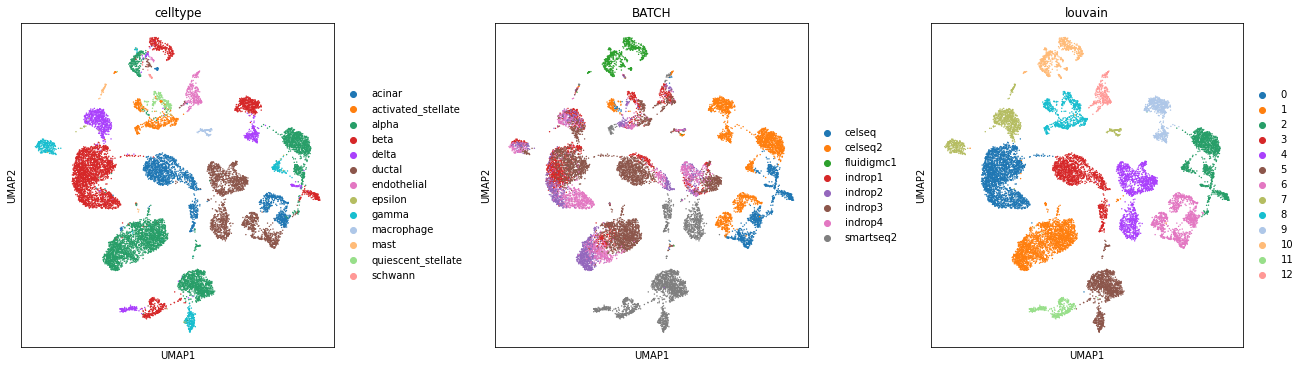

                   Raw
ARI              0.503
NMI              0.662
ASW_label        0.587
ASW_label/batch  0.776
BatchKL          2.355
cLISI            1.000
iLISI            1.026


In [2]:
method="Raw"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    Raw_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(Raw_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_raw.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    adata_raw=sc.AnnData(adata_integrated.obsm["X_pca"])
    adata_raw.obs=adata_integrated.obs.copy()

    adata_integrated=adata_raw.copy()
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
    #adata_integrated.obsm["X_emb"]=adata_integrated.obsm["X_pca"].copy()

    adata_integrated,Raw_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")

    plt.show()
    Raw_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(Raw_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")


# scDML(reassign)

evaluation file exists,dont't need rerun


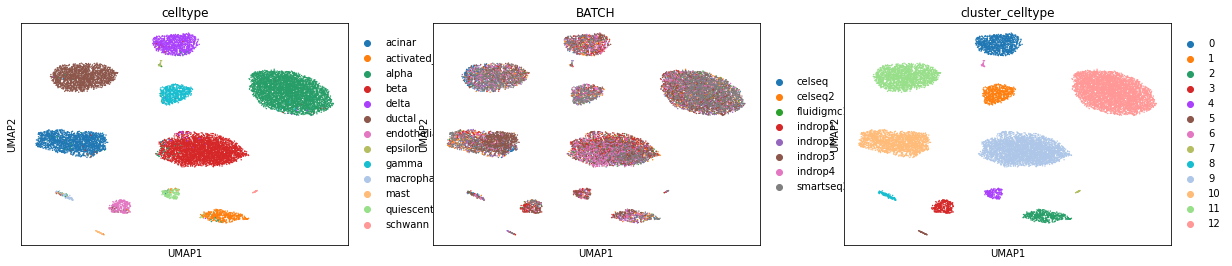

                scDML(reassign)
ARI                       0.954
NMI                        0.93
ASW_label                    --
ASW_label/batch              --
BatchKL                      --
cLISI                        --
iLISI                        --


In [3]:
method="scDML"
# scDML_script.py have been calculate umap!!!!
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","cluster_celltype"])        
    scDML_reassign=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv",index_col=0)
    print(scDML_reassign)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    from sklearn.metrics.cluster import normalized_mutual_info_score
    ARI= ari(adata_integrated.obs["celltype"].astype(str), adata_integrated.obs["cluster_celltype"].astype(str))
    NMI= normalized_mutual_info_score(adata_integrated.obs["celltype"].astype(str), adata_integrated.obs["cluster_celltype"].astype(str))
    print("ARI={}".format(ARI))
    print("NMI={}".format(NMI))
    results = {
    'ARI': np.round(ARI,3),
    'NMI': np.round(NMI,3),
    'ASW_label': "--",
    'ASW_label/batch': "--",
    #'kBET': kBET_value[0],
     'BatchKL':"--",
     'cLISI':"--",  
     'iLISI':"--"
    }
    print("....................................... calculate all metric done .................................")
    scDML_reassign= pd.DataFrame.from_dict(results, orient='index')
    scDML_reassign.columns=[method+"(reassign)"]
    scDML_reassign.to_csv(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv")
    #scDML_reassign

# scDML(louvain)

evaluation file exists,dont't need rerun


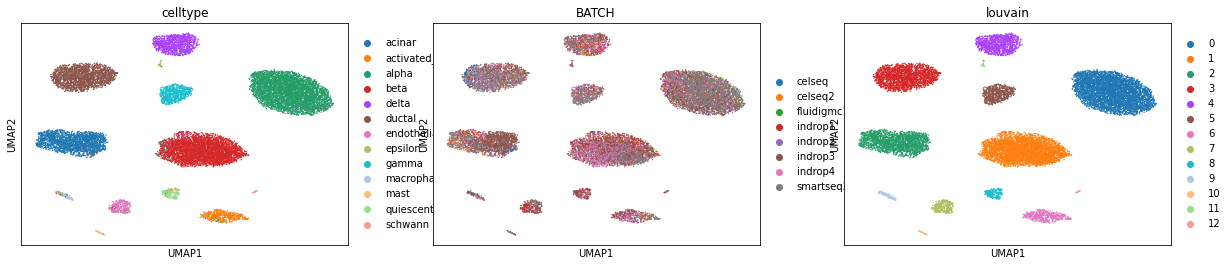

                 scDML(louvain)
ARI                       0.954
NMI                       0.930
ASW_label                 0.824
ASW_label/batch           0.872
BatchKL                   0.679
cLISI                     1.000
iLISI                     3.300


In [4]:
method="scDML"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    scDML3_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv",index_col=0)
    print(scDML3_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)

    adata_scDML=sc.AnnData(adata_integrated.obsm["X_emb"])
    adata_scDML.obs=adata_integrated.obs.copy()
    adata_integrated=adata_scDML.copy() #
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()

    adata_integrated,scDML3_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()

    scDML3_eva.columns=[method+"(louvain)"] ## modify column names
    scDML3_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv")
    print(scDML3_eva)

    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# fastMNN

evaluation file exists,dont't need rerun


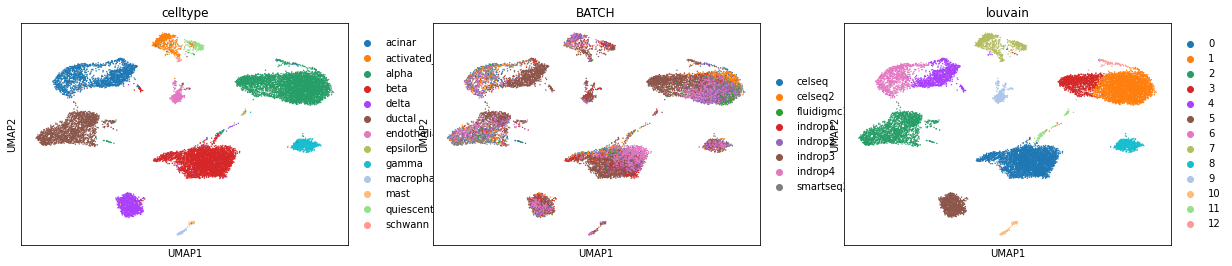

                 fastMNN
ARI                0.810
NMI                0.862
ASW_label          0.658
ASW_label/batch    0.895
BatchKL            1.078
cLISI              1.000
iLISI              2.360


In [5]:
method="fastMNN"

if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    fastMNN_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(fastMNN_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"

    adata_fastMNN=sc.read_h5ad(args_integrated)
    print(adata_fastMNN)

    adata_mnn=sc.AnnData(adata_fastMNN.obsm["X_mnn"])
    adata_mnn.obs=adata_fastMNN.obs.copy()
#     print(adata_mnn)
#     sc.tl.pca(adata_mnn)
#     sc.pp.neighbors(adata_mnn)
#     sc.tl.umap(adata_mnn)
#     sc.pl.umap(adata_mnn,color=["BATCH","celltype"])
    #######################################################
    adata_integrated=adata_mnn.copy()
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()

    adata_integrated,fastMNN_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")

    plt.show()

    fastMNN_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(fastMNN_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# harmony

evaluation file exists,dont't need rerun


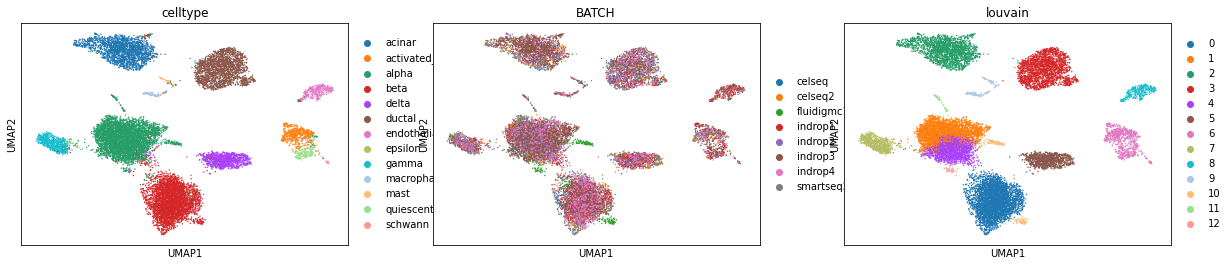

                 harmony
ARI                0.766
NMI                0.838
ASW_label          0.663
ASW_label/batch    0.881
BatchKL            0.784
cLISI              1.000
iLISI              2.944


In [6]:
method="harmony"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    harmony_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(harmony_eva)
    
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    print("================================Visulizing the embedding data================================")
    adata_harmony=sc.AnnData(adata_integrated.obsm["X_harmony"])
    adata_harmony.obs=adata_integrated.obs.copy()
    print(adata_harmony)
#     sc.tl.pca(adata_harmony)
#     sc.pp.neighbors(adata_harmony)
#     sc.tl.umap(adata_harmony)
#     sc.pl.umap(adata_harmony,color=["BATCH","celltype"])#

    adata_integrated=adata_harmony.copy()

    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
    adata_integrated,harmony_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()

    harmony_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(harmony_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# Seurat3

evaluation file exists,dont't need rerun


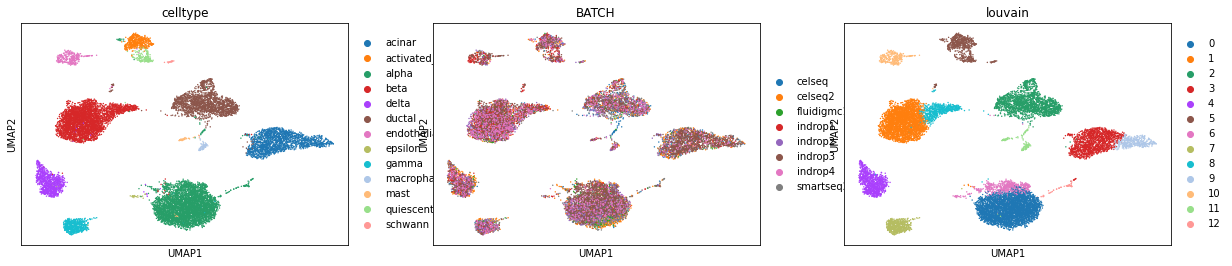

                 Seurat3
ARI                0.820
NMI                0.877
ASW_label          0.723
ASW_label/batch    0.887
BatchKL            0.654
cLISI              1.000
iLISI              3.376


In [7]:
###################################################################
method="Seurat3"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    Seurat3_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(Seurat3_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    sc.tl.pca(adata_integrated)
#     print("================================Visulizing the embedding data================================")
#     sc.pp.neighbors(adata_integrated)
#     sc.tl.umap(adata_integrated)
#     sc.pl.umap(adata_integrated,color=["BATCH","celltype"])

    adata_integrated.obsm["X_emb"]=adata_integrated.obsm["X_pca"].copy()
    adata_integrated,Seurat3_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()

    Seurat3_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(Seurat3_eva)

    adata_integrated.__dict__['_raw'].__dict__['_var'] = adata_integrated.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# Scanorama_raw_counts

evaluation file exists,dont't need rerun


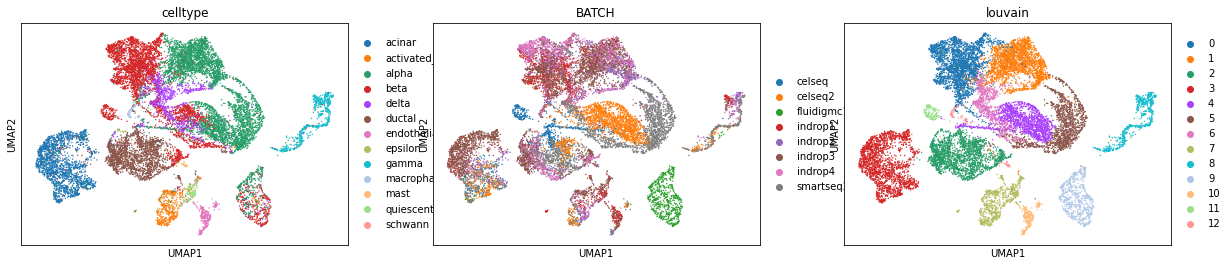

                 Scanorama_raw
ARI                      0.475
NMI                      0.608
ASW_label                0.571
ASW_label/batch          0.831
BatchKL                  1.785
cLISI                    1.014
iLISI                    1.667


In [8]:
###################################################################
method="Scanorama_raw"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    Scanorama_raw_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(Scanorama_raw_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    #print("================================Visulizing the embedding data================================")
#     sc.tl.pca(adata_integrated)
#     sc.pp.neighbors(adata_integrated)
#     sc.tl.umap(adata_integrated)
#     sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
    
    adata_Scanorama_raw=sc.AnnData(adata_integrated.obsm["X_scanorama"])
    adata_Scanorama_raw.obs=adata_integrated.obs.copy()
    adata_integrated=adata_Scanorama_raw.copy() #
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()

    adata_integrated,Scanorama_raw_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")

    plt.show()

    Scanorama_raw_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(Scanorama_raw_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# Scanorama(Log 1p)

evaluation file exists,dont't need rerun


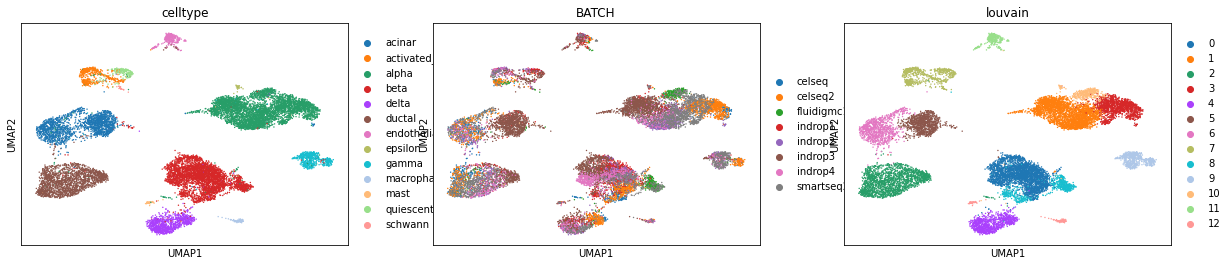

                 Scanorama
ARI                  0.683
NMI                  0.821
ASW_label            0.598
ASW_label/batch      0.914
BatchKL              1.544
cLISI                1.000
iLISI                1.926


In [9]:
###################################################################
method="Scanorama"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    Scanorama_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(Scanorama_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    #print("================================Visulizing the embedding data================================")
#     sc.tl.pca(adata_integrated)
#     sc.pp.neighbors(adata_integrated)
#     sc.tl.umap(adata_integrated)
#     sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
    
    adata_scanorama=sc.AnnData(adata_integrated.obsm["X_scanorama"])
    adata_scanorama.obs=adata_integrated.obs.copy()
    adata_integrated=adata_scanorama.copy() #
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()

    adata_integrated,Scanorama_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")

    plt.show()

    Scanorama_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(Scanorama_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# INSCT

evaluation file exists,dont't need rerun


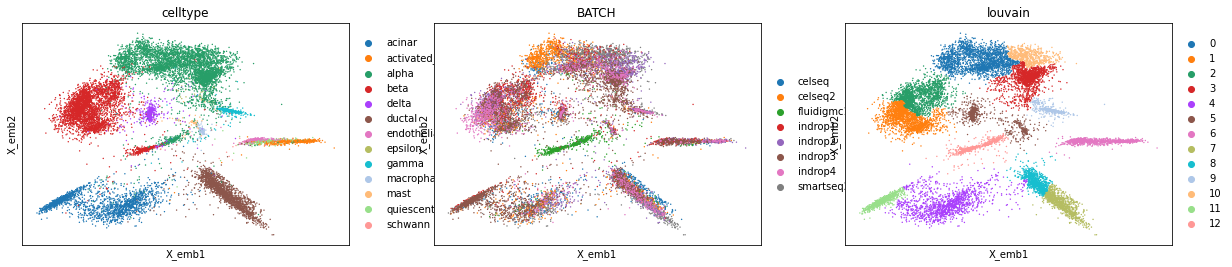

                 INSCT
ARI              0.490
NMI              0.709
ASW_label        0.662
ASW_label/batch  0.692
BatchKL          0.994
cLISI            1.001
iLISI            3.087


In [10]:
method="INSCT"
## use emb
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.embedding(adata_evaluated,basis="X_emb",color=["celltype","BATCH","louvain"])    
    INSCT_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(INSCT_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    print("================================Visulizing the embedding data================================")
    sc.tl.pca(adata_integrated)
    sc.pp.neighbors(adata_integrated)
    sc.tl.umap(adata_integrated)
    sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
    adata_integrated,INSCT_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.embedding(adata_integrated,basis="emb",color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.embedding(adata_integrated,basis="emb",color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.embedding(adata_integrated,basis="emb",color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()

    INSCT_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(INSCT_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# BBKNN

evaluation file exists,dont't need rerun


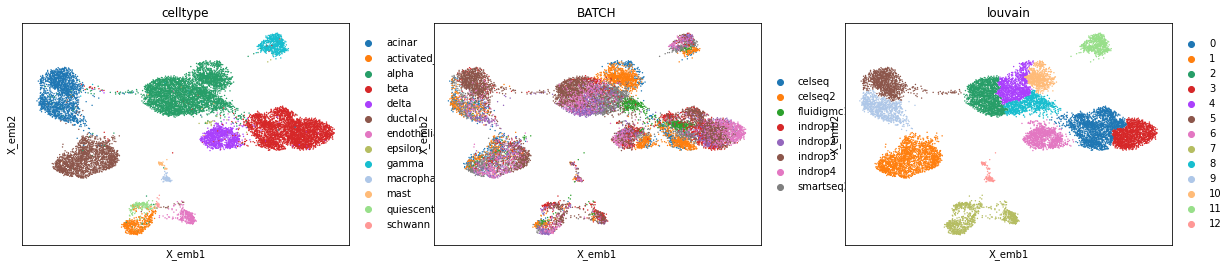

                 BBKNN
ARI              0.540
NMI              0.769
ASW_label        0.729
ASW_label/batch  0.681
BatchKL          1.403
cLISI            1.001
iLISI            2.181


In [11]:
method="BBKNN"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.embedding(adata_evaluated,basis="X_emb",color=["celltype","BATCH","louvain"])    
    BBKNN_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(BBKNN_eva)  
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    print("================================Visulizing the embedding data================================")
#     sc.tl.pca(adata_integrated)
#     sc.pp.neighbors(adata_integrated)
#     sc.tl.umap(adata_integrated)
#     sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
    adata_integrated,BBKNN_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.embedding(adata_integrated,basis="emb",color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.embedding(adata_integrated,basis="emb",color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.embedding(adata_integrated,basis="emb",color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()

    BBKNN_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(BBKNN_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# Liger

evaluation file exists,dont't need rerun


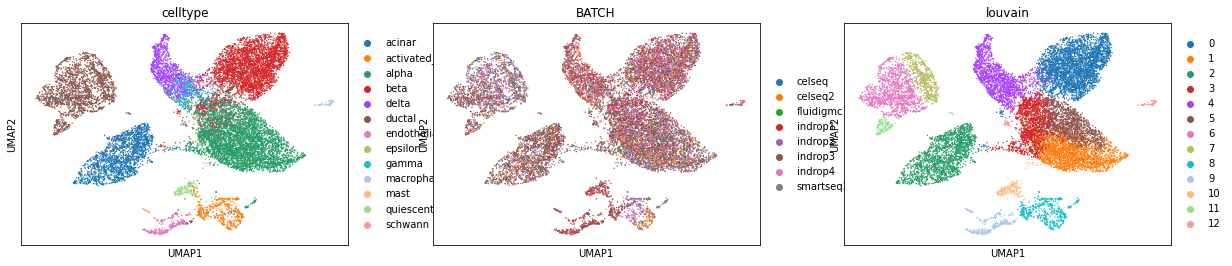

                 liger
ARI              0.586
NMI              0.701
ASW_label        0.630
ASW_label/batch  0.827
BatchKL          0.438
cLISI            1.002
iLISI            3.998


In [12]:
method="liger"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    liger_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(liger_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    print("================================Visulizing the embedding data================================")
    adata_liger=sc.AnnData(adata_integrated.obsm["X_iNMF"])
    adata_liger.obs=adata_integrated.obs.copy()
    print(adata_liger)
    sc.tl.pca(adata_liger)
    sc.pp.neighbors(adata_liger)
    sc.tl.umap(adata_liger)
    sc.pl.umap(adata_liger,color=["BATCH","celltype"])

    adata_integrated=adata_liger.copy()

    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()

    adata_integrated,liger_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()

    liger_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(liger_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# BERMUDA

evaluation file exists,dont't need rerun


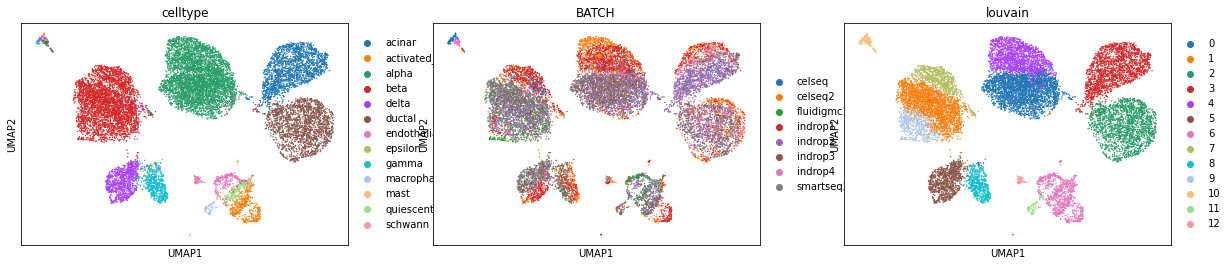

                 BERMUDA
ARI                0.658
NMI                0.793
ASW_label          0.525
ASW_label/batch    0.810
BatchKL            1.070
cLISI              1.000
iLISI              2.673


In [13]:
method="BERMUDA"

if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    bermuda_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(bermuda_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    if(os.path.exists(args_integrated)):
        print(args_integrated)
        adata_integrated=sc.read_h5ad(args_integrated)
        print(adata_integrated)
        print("================================Visulizing the embedding data================================")
        sc.tl.pca(adata_integrated)
        sc.pp.neighbors(adata_integrated)
        sc.tl.umap(adata_integrated)
        sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
        adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
        adata_integrated,bermuda_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

        fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
        sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
        sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
        sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
        plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
        plt.show()
        bermuda_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
        print(bermuda_eva)
        adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    else:
        fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
        plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
        plt.show()    
        results = {
        'ARI': "--",
        'NMI': "--",
        'ASW_label': "--",
        'ASW_label/batch': "--",
        #'kBET': kBET_value[0],
         'BatchKL':"--",
         'cLISI':"--",  
         'iLISI':"--"
        }
        print("....................................... calculate all metric done .................................")
        bermuda_eva = pd.DataFrame.from_dict(results, orient='index')
        bermuda_eva.columns=[method]
        bermuda_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
        bermuda_eva

# scVI

evaluation file exists,dont't need rerun


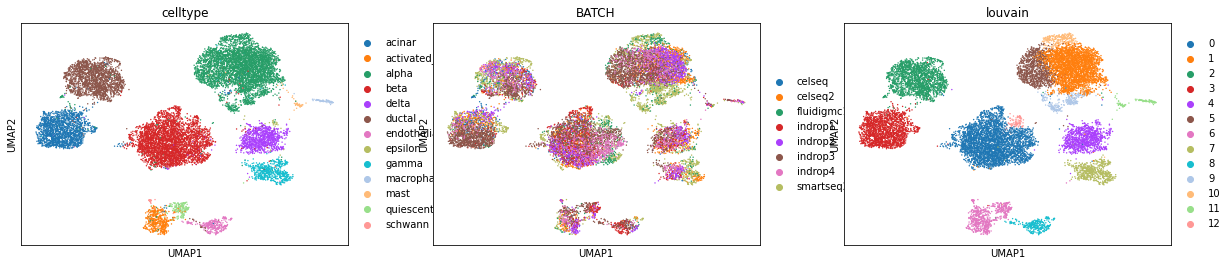

                  scVI
ARI              0.779
NMI              0.848
ASW_label        0.611
ASW_label/batch  0.859
BatchKL          1.148
cLISI            1.000
iLISI            2.269


In [14]:
method="scVI"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    scVI_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(scVI_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    print("================================Visulizing the embedding data================================")
#     sc.tl.pca(adata_integrated)
#     sc.pp.neighbors(adata_integrated)
#     sc.tl.umap(adata_integrated)
#     sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
    adata_integrated,scVI_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()

    scVI_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(scVI_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# carDEC(resign)

evaluation file exists,dont't need rerun


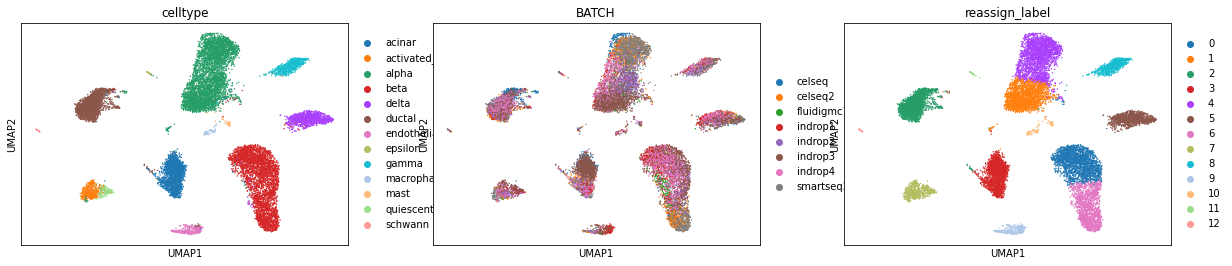

                carDEC(reassign)
ARI                        0.687
NMI                        0.857
ASW_label                     --
ASW_label/batch               --
BatchKL                       --
cLISI                         --
iLISI                         --


In [15]:
method="carDEC"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","reassign_label"])    
    carDEC_reassign=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv",index_col=0)
    print(carDEC_reassign)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    from sklearn.metrics.cluster import adjusted_rand_score,normalized_mutual_info_score
    ARI= adjusted_rand_score(adata_integrated.obs["celltype"].astype(str), adata_integrated.obs["reassign_label"].astype(str))
    NMI= normalized_mutual_info_score(adata_integrated.obs["celltype"].astype(str), adata_integrated.obs["reassign_label"].astype(str))
    print("ARI={}".format(ARI))
    print("NMI={}".format(NMI))
    results = {
    'ARI': np.round(ARI,3),
    'NMI': np.round(NMI,3),
    'ASW_label': "--",
    'ASW_label/batch': "--",
    #'kBET': kBET_value[0],
     'BatchKL':"--",
     'cLISI':"--",  
     'iLISI':"--"
    }
    print("....................................... calculate all metric done .................................")
    carDEC_reassign= pd.DataFrame.from_dict(results, orient='index')
    carDEC_reassign.columns=[method+"(reassign)"]
    carDEC_reassign.to_csv(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv")

# carDEC(louvain)

evaluation file exists,dont't need rerun


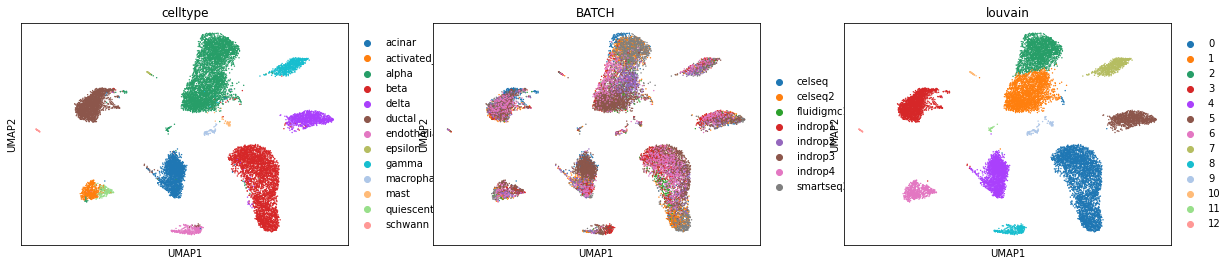

                 carDEC(louvain)
ARI                        0.804
NMI                        0.892
ASW_label                  0.817
ASW_label/batch            0.847
BatchKL                    1.198
cLISI                      1.000
iLISI                      2.292


In [16]:
method="carDEC"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    carDEC_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv",index_col=0)
    print(carDEC_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)

    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()## add X_emb
    adata_integrated,carDEC3_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

#     sc.tl.pca(adata_integrated)
#     sc.pp.neighbors(adata_integrated)
#     sc.tl.umap(adata_integrated)
#     sc.pl.umap(adata_integrated,color=["BATCH","celltype","louvain"])#
    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()

    carDEC3_eva.columns=[method+"(louvain)"] ## modify column names
    carDEC3_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv")
    print(carDEC3_eva)

    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# iSMNN

In [17]:
# method="iSMNN"
# if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
#     print("evaluation file exists,dont't need rerun")
# else:
#     args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"

#     adata_integrated=sc.read_h5ad(args_integrated)
#     print(adata_integrated)
#     adata_integrated.obs["celltype"]=adata_integrated.obs["cell.anno"].copy()
#     adata_integrated.obs["BATCH"]=adata_integrated.obs["batch_id"].copy()
#     adata_integrated.obsm["X_emb"]=adata_integrated.obsm["X_pca"].copy()
#     adata_integrated,iSMNN_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

#     fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
#     sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
#     sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
#     sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
#     plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
#     plt.show()

#     iSMNN_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
#     print(iSMNN_eva)
#     adata_integrated.__dict__['_raw'].__dict__['_var'] = adata_integrated.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})
#    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# summary evaluation of all method to  table

In [18]:
method_list=["Raw","scDML","fastMNN","harmony","Seurat3","Scanorama","INSCT","BBKNN","liger","BERMUDA","scVI","carDEC"]

df_ls=[]
for method in method_list:
    #print(method)
    if(method=="scDML" or method=="carDEC"):
        method_eva1=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv",index_col=0)
        df_ls.append(method_eva1)
        method_eva2=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv",index_col=0)
        df_ls.append(method_eva2)
    else:
        method_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
        df_ls.append(method_eva)

result = pd.concat(df_ls, join='outer', axis=1)
result.columns=["Raw","scDML(reassign)","scDML(louvain)"]+method_list[2:-1]+["carDEC(reassign)","carDEC(louvain)"]
result.index.name=dataset ## add title for column names 
#result=result.round(3) ## only save 3 precision of float
result.to_csv(save_dir+dataset+"_evaluation.csv")
result


,Raw,scDML(reassign),scDML(louvain),fastMNN,harmony,Seurat3,Scanorama,INSCT,BBKNN,liger,BERMUDA,scVI,carDEC(reassign),carDEC(louvain)
pancreas,,,,,,,,,,,,,,
ARI,0.503,0.954,0.954,0.810,0.766,0.820,0.683,0.490,0.540,0.586,0.658,0.779,0.687,0.804
NMI,0.662,0.93,0.930,0.862,0.838,0.877,0.821,0.709,0.769,0.701,0.793,0.848,0.857,0.892
ASW_label,0.587,--,0.824,0.658,0.663,0.723,0.598,0.662,0.729,0.630,0.525,0.611,--,0.817
ASW_label/batch,0.776,--,0.872,0.895,0.881,0.887,0.914,0.692,0.681,0.827,0.810,0.859,--,0.847
BatchKL,2.355,--,0.679,1.078,0.784,0.654,1.544,0.994,1.403,0.438,1.070,1.148,--,1.198
cLISI,1.000,--,1.000,1.000,1.000,1.000,1.000,1.001,1.001,1.002,1.000,1.000,--,1.000
iLISI,1.026,--,3.300,2.360,2.944,3.376,1.926,3.087,2.181,3.998,2.673,2.269,--,2.292
